# Visión por Computadora 1

## Trabajo Práctico 1

In [349]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
import pathlib

### **Parte 1 (imágenes en `/white_patch`)**

**1. Implementar el algoritmo White Patch para librarnos de las diferencias de color de iluminación.** <br>

**2. Mostrar los resultados obtenidos y analizar las posibles fallas (si es que las hay) en el caso de White patch.**


In [350]:
def white_patch_correction(image, percentile=99):
    """
    Apply white patch color correction to the input image.

    Parameters:
    - image: Input image in RGB
    - percentile: Percentile value to determine the white point

    Returns:
    - Corrected image in RGB
    """
    
    # Convert image to float32 for precision
    img_float = image.astype(np.float32)

    # Calculate the percentile values for each channel
    r_max = np.percentile(img_float[:, :, 0], percentile)
    g_max = np.percentile(img_float[:, :, 1], percentile)
    b_max = np.percentile(img_float[:, :, 2], percentile)

    # Avoid division by zero
    r_max = r_max if r_max != 0 else 1.0
    g_max = g_max if g_max != 0 else 1.0
    b_max = b_max if b_max != 0 else 1.0

    # Calculate scaling factors
    r_scale = 255.0 / r_max
    g_scale = 255.0 / g_max
    b_scale = 255.0 / b_max

    # Apply scaling
    img_float[:, :, 0] *= r_scale
    img_float[:, :, 1] *= g_scale
    img_float[:, :, 2] *= b_scale

    # Clip values to [0, 255] and convert back to uint8
    corrected_image = np.clip(img_float, 0, 255).astype(np.uint8)

    return corrected_image

In [351]:
def load_image(image_filename):
    """
    Load an image in RGB format.

    Parameters:
    - image_filename: Image filename

    Returns:
    - Image in RGB format
    """
    
    TEST_IMAGE_PATH = pathlib.Path(f"material/white_patch/{image_filename}")

    img = cv.imread(str(TEST_IMAGE_PATH), cv.IMREAD_COLOR_RGB)

    if img is not None:
        print(f"'{TEST_IMAGE_PATH}' loaded ok\n")
        print(f"Shape:\n  x: {img.shape[1]} px \n  y: {img.shape[0]} px\n  channels: {img.shape[2]}")

        plt.title('Original image')
        plt.imshow(img)

        return img
    else:
        print(f"Error loading '{TEST_IMAGE_PATH}'")
    

In [352]:
def plot_color_profiles(image, column_num=0):
    """
    Plot color profiles of the image at a specified column.

    Parameters:
    - image: Input image in RGB
    - column_num: Column number to extract the color profile
    """
    
    profile_red = image[:, column_num, 0]  # Red channel
    profile_green = image[:, column_num, 1]  # Green channel
    profile_blue = image[:, column_num, 2]  # Blue channel

    plt.figure(figsize=(8, 6))
    plt.subplot(2, 1, 1)
    plt.plot(profile_red, color='red')
    plt.plot(profile_green, color='green')
    plt.plot(profile_blue, color='blue')
    plt.title('Color profile at column ' + str(column_num))
    plt.ylabel('Intensity')

    plt.subplot(2, 1, 2)
    plt.imshow(image)
    plt.axvline(x=column_num, color='yellow', linestyle='--', linewidth=2)
    plt.title('Original image')
    plt.tight_layout()
    plt.show()

In [353]:
def apply_white_patch_and_compare(image, percentile=99):
    """
    Apply white patch correction and compare original and corrected images.

    Parameters:
    - image: Input image in RGB
    - percentile: Percentile value for white patch correction

    Returns:
    - Corrected image in RGB
    """
    
    plt.figure(figsize=(18, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(image)
    plt.title("Original image")

    corrected_image = white_patch_correction(image, percentile=percentile)
    plt.subplot(1, 2, 2)
    plt.imshow(corrected_image)
    plt.title("Corrected image (White patch)")

    return corrected_image

In [354]:
def histograms_compare(image, corrected_image):
    """
    Compare histograms of original and corrected images.

    Parameters:
    - image: Original image in RGB
    - corrected_image: Corrected image in RGB
    """
    
    # Histograms original vs corrected
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))

    # Original
    histograms_original = []
    for i in range(3):
        hist, _ = np.histogram(image[:, :, i].ravel(), bins=256, range=(0, 256))
        histograms_original.append(hist)

    max_freq_original = max(hist.max() for hist in histograms_original)

    for i, color in enumerate(['red', 'green', 'blue']):
        axes[0, i].hist(image[:, :, i].ravel(), bins=256, color=color, alpha=0.8)
        axes[0, i].set_title(f'Original - {color.capitalize()} channel')
        axes[0, i].set_xlabel('Pixel intensity')
        axes[0, i].set_ylabel('Frequency')
        axes[0, i].set_xlim([0, 256])
        axes[0, i].set_ylim([0, max_freq_original * 1.05])
        axes[0, i].grid(alpha=0.3)

    # Corrected
    histograms_corrected = []
    for i in range(3):
        hist, _ = np.histogram(corrected_image[:, :, i].ravel(), bins=256, range=(0, 256))
        histograms_corrected.append(hist)

    max_freq_corrected = max(hist.max() for hist in histograms_corrected)

    for i, color in enumerate(['red', 'green', 'blue']):
        axes[1, i].hist(corrected_image[:, :, i].ravel(), bins=256, color=color, alpha=0.8)
        axes[1, i].set_title(f'Corrected (White patch) - {color.capitalize()} channel')
        axes[1, i].set_xlabel('Pixel intensity')
        axes[1, i].set_ylabel('Frequency')
        axes[1, i].set_xlim([0, 256])
        axes[1, i].set_ylim([0, max_freq_corrected * 1.05])
        axes[1, i].grid(alpha=0.3)

    plt.tight_layout()
    plt.show()

### Test en imágenes de prueba

'material\white_patch\test_blue.png' loaded ok

Shape:
  x: 278 px 
  y: 100 px
  channels: 3


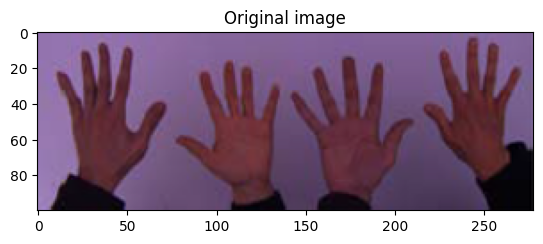

In [355]:
img_filename_dict = {
    "0": "test_blue.png",
    "1": "test_green.png",
    "2": "test_red.png",
    "3": "wp_blue.jpg",
    "4": "wp_green.png",
    "5": "wp_green2.jpg",
    "6": "wp_red.png",
    "7": "wp_red2.jpg",
}

test_image = load_image(img_filename_dict["0"])

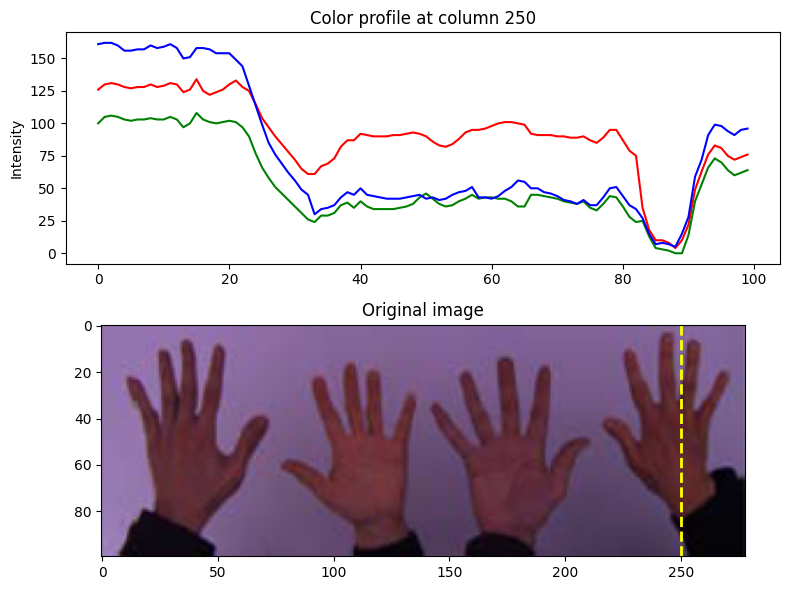

In [356]:
COL = 250  # Column to analyze

plot_color_profiles(test_image, column_num=COL)

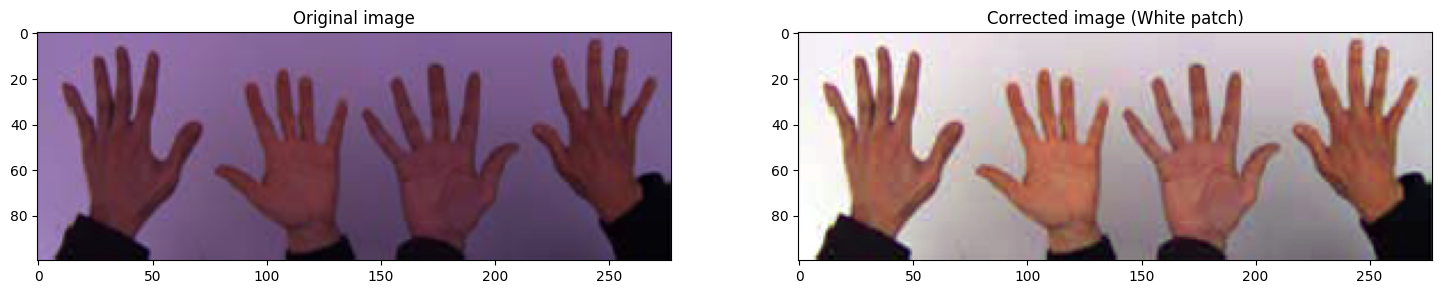

In [ ]:
PERCENTILE = 99.9  # Percentile for white patch correction

corrected_test_image = apply_white_patch_and_compare(test_image, percentile=PERCENTILE)

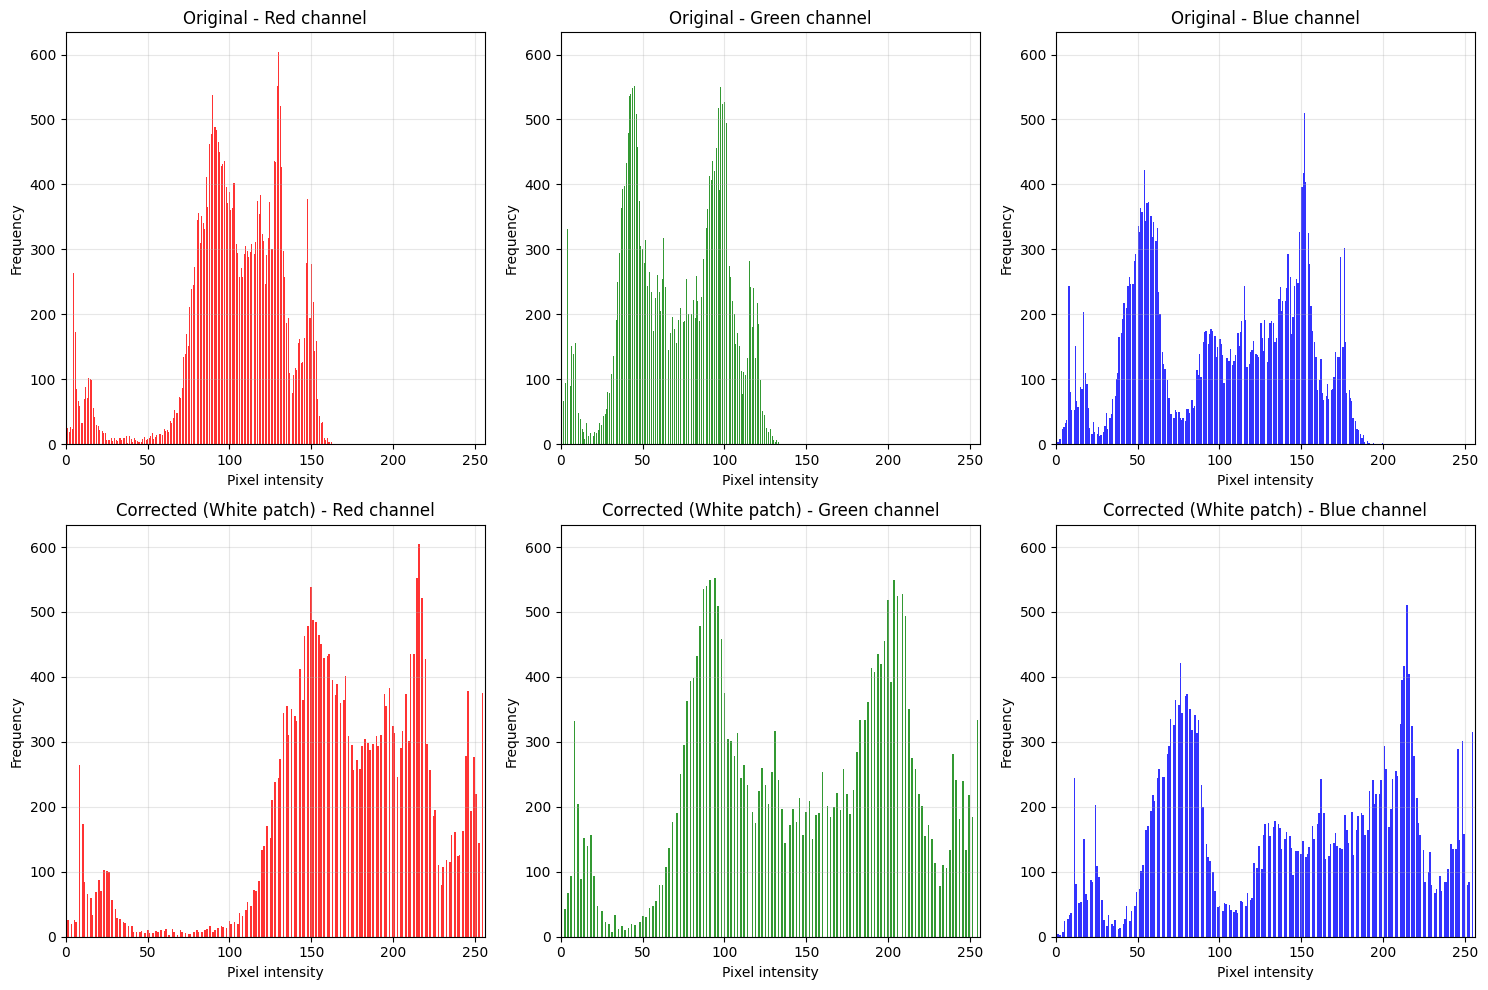

In [358]:
histograms_compare(test_image, corrected_test_image)

**Es clave la correcta elección del percentil para el buen funcionamiento del algoritmo White patch, ya que para percentiles bajos se terminan saturando los canales.** <br>
Probando diferentes percentiles, se observa que un percentil del 99.9% funciona bien para las imágenes de las manos, ya que logra corregir el tinte sin saturar los canales de color. Sin embargo, percentiles más bajos (<99.9%) tienden a saturar los canales, lo que resulta en una pérdida de información en esas áreas de la imagen. <br>
### FALTA ANALIZAR BIEN CON LAS IMAGENES DEL DEPREDADOR, NO ANDA TAN BIEN EL ALGORITMO AHI


---

### **Parte 2**

**1. Para las imágenes `img1_tp.png` y `img2_tp.png`, leerlas con OpenCV en escala de grises y visualizarlas.** <br>

**2. Elija el número de bins que crea conveniente y grafique su histograma. Compare los histogramas entre sí. Explique lo que se observa, si tuviera que entrenar un modelo de clasificación/detección de imágenes, ¿considera que puede ser de utilidad tomar como 'features' los histogramas?**
